**This notebook will introduce you to comptational physics by providing an extremely elementary, though effective, way of calculating the interference
pattern of several slits. Knowledge of Python may help, but is not needed to solve the entire question.**

# Instructions
- To run this entire notebook, click Runtime > Run All
- To run a specific section, select it, and click Runtime > Run Selection

For those who have not worked with Jupyter notebooks before, you may view this as a tool that allows you to execute code in steps.

The only thing you need to change is the 3rd last cell (right before the text that says "important").

We first introduce a few packages. These are fairly standard and are usually always imported.

In [8]:
# Import important packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We create a function generate_slit() that takes parameters which describe a single slit, and generate lattice points, which is where the light waves will originate from.

The second function generate_slits(), takes in input that describes multiple slits, and uses the above function to generate all the lattice points.

In [9]:
def generate_slit(xc, w, h, wavelength, amplitude):
  # Generates a slit of width w, height h, centered at (xc, 0)
  lattice_grid = []

  # Loop through all x and y lattice points
  for x in np.arange(xc - w/2 + wavelength/2, xc + w/2 + wavelength/2, wavelength):
      for y in np.arange(-h/2+ wavelength/2 , h/2 + wavelength / 2, wavelength):

        # Each element in the lattice grid contains information about its
        # position, and how much amplitude it lets through
        lattice_grid.append((x,y,amplitude))

  # Return the array of lattice points
  return lattice_grid

def generate_slits(arr_slit):
  # Generates multiple slits given a 2D array describing them

  lattice_grid = []
  for slit in arr_slit:
    lattice_grid = lattice_grid + generate_slit(slit[0], slit[1], slit[2], slit[3], slit[4])
  
  return lattice_grid

The following is a helper function that determines the distance between two points.

In [10]:
def dist(lattice_p, screen_p, width):
  # distance function if wall is a distance "width" away
  return np.sqrt(
                    (lattice_p[0]-screen_p[0])**2+ 
                    (lattice_p[1]-screen_p[1])**2+
                    width**2
                  )

The amplitude is calculated as a complex phasor. Here, "j" is the imaginary number.

In [11]:
def amplitude(distance,wavelength):
  # calculates the amplitude
  phi = distance / wavelength * 2*np.pi
  return np.exp(phi*1j)

**IMPORTANT: Below are the parameters that you should be changing in this problem. There is no need to touch anything else.**

In [12]:
wavelength = 1 # wavelength
width = 500000.0 * wavelength # distance to screen

# Note that the parameters for each slit is:
# [x position of center,
#  width of slit, 
#  height of slit,
#  wavelength of light passing through,
#  amplitude of light passing through]

slits = [
          [0, 1*wavelength, wavelength, wavelength, 0.39717315],
          [-1, 1*wavelength, wavelength, wavelength, 0.32141899],
          [1, 1*wavelength, wavelength, wavelength, 0.32141899],
          [-2, 1*wavelength, wavelength, wavelength, 0.2469448],
          [2, 1*wavelength, wavelength, wavelength, 0.2469448],
          [-3, 1*wavelength, wavelength, wavelength, 0.15784402],
          [3, 1*wavelength, wavelength, wavelength, 0.15784402],
          [-4, 1*wavelength, wavelength, wavelength, 0.06253747],
          [4, 1*wavelength, wavelength, wavelength, 0.06253747],
        ]

x_lower = -400000 # Leftmost point on the screen
x_upper = 400000 # Rightmost point on the screen
N = 10000 # Number of locations the intensity is calculated at.

The following is a loop that calculates and plots out the intensity pattern.

Text(0.5, 0, 'Location on Screen')

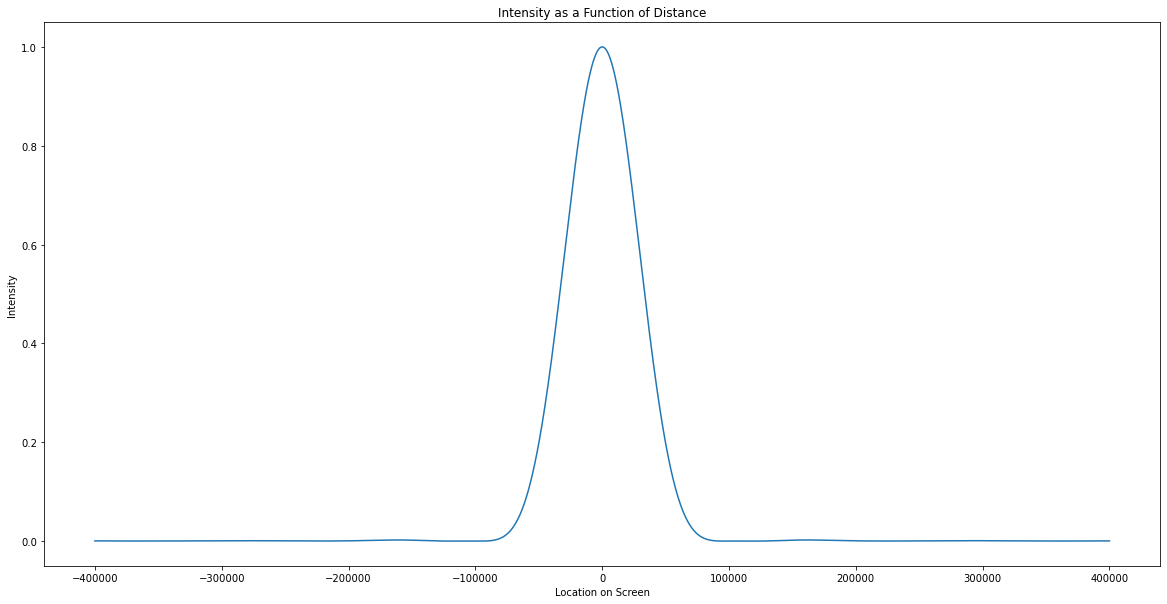

In [13]:
lattice_points = generate_slits(slits) # Create all the lattice points
r_list = [] # List of positions on the screen where intensity is calculated
intensity_list = [] # Corresponding intensities w.r.t list above

# Loop through every point on the screen
for r in np.linspace(x_lower, x_upper, N):

    screen_point = (r, 0) # Location of point on screen
    amplitudeSum = 0 # The amplitude initializes at 0

    # Loop through every lattice point
    for lattice_point in lattice_points:

        # Calculate distance
        distance = dist(lattice_point,screen_point,width)

        # Calculate the amplitude
        a = lattice_point[2]*amplitude(distance, wavelength)

        # Sum up the amplitude
        amplitudeSum += a

    # Add position of screen and corresponding intensity to list
    r_list.append(r)
    intensity_list.append(abs(amplitudeSum)**2)

# Normalize the intensity
intensity_list = intensity_list/max(intensity_list)

# Plot it out
plt.figure(figsize=(20, 10))
plt.subplot(111)
plt.plot(r_list,intensity_list,label="Experimental")
#plt.plot(dummy_x,dummy_y,color="orange",linestyle="dashed",label="Theoretical")
#plt.legend()
#error = (intensity_list - dummy_y) / (dummy_y + 0.001)
#plt.plot(r_list, error)
#plt.axhline(0,color="black")
#plt.axhline(0.1,color="black",linestyle="dashed")
plt.title('Intensity as a Function of Distance')
plt.ylabel("Intensity")
plt.yticks(np.linspace(0,1,6))
plt.xlabel("Location on Screen")

The following is optional, but allows you to important the data into a file for futher analysis. Clicking the folder button on the left side bar will allow you to view and download the file.

In [14]:
amplitude_list = np.sqrt(np.array(intensity_list))
df = pd.DataFrame({"x" : np.array(r_list), "Amplitude" : np.array(amplitude_list)})
df.to_csv("data.csv", index=False)